## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Train
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Codification  
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel('gameInfosTreated.xlsx')

df

,title,release,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,players_number,genre_split
0,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,1 Player,Action Adventure
1,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,1 Player,Fantasy
2,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Sports
3,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Alternative
4,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Skateboarding
...,...,...,...,...,...,...,...,...,...,...
64558,RIDE TO HELL: RETRIBUTION,06/24/2013,PC,16,9,1.4,609,Eutechnyx,1-2 Player(s),Action Adventure
64559,RIDE TO HELL: RETRIBUTION,06/24/2013,PC,16,9,1.4,609,Eutechnyx,1-2 Player(s),General
64560,FAMILY PARTY: 30 GREAT GAMES OBSTACLE ARCADE,12/04/2012,Wii U,11,8,2.7,195,"Art Co., Ltd.",No Online Multiplayer,Miscellaneous
64561,FAMILY PARTY: 30 GREAT GAMES OBSTACLE ARCADE,12/04/2012,Wii U,11,8,2.7,195,"Art Co., Ltd.",No Online Multiplayer,Party


### Tests

In [3]:
# genre title 

df1 = df.drop_duplicates('title', keep='first')
df2 = df.drop_duplicates('title', keep='last')

display(df1, df2)

,title,release,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,players_number,genre_split
0,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,1 Player,Action Adventure
2,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,1-2,Sports
5,GRAND THEFT AUTO IV,04/29/2008,PlayStation 3,98,64,7.8,4811,Rockstar North,1 Player,Action Adventure
8,SOULCALIBUR,09/08/1999,Dreamcast,98,24,8.4,404,Namco,1-2,Action
14,SUPER MARIO GALAXY,11/12/2007,Wii,97,73,9.1,3795,Nintendo,No Online Multiplayer,Action
...,...,...,...,...,...,...,...,...,...,...
64534,SPOGS RACING,07/07/2008,Wii,18,7,3.7,22,Pronto Games,1-2 Player(s),Driving
64538,DOUBLE DRAGON II: WANDER OF THE DRAGONS,04/05/2013,Xbox 360,17,19,1.6,59,Gravity Corporation,1-2 Player(s),Action
64541,VROOM IN THE NIGHT SKY,04/05/2017,Switch,17,15,3.3,109,Poisoft,No Online Multiplayer,Sports
64549,YARIS,10/10/2007,Xbox 360,17,7,4.4,136,Backbone Entertainment,2 Online,Driving


,title,release,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,players_number,genre_split
1,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,1 Player,Fantasy
16,SUPER MARIO GALAXY,11/12/2007,Wii,97,73,9.1,3795,Nintendo,No Online Multiplayer,3D
19,SUPER MARIO GALAXY 2,05/23/2010,Wii,97,87,9.1,2942,Nintendo EAD Tokyo,No Online Multiplayer,3D
54,METROID PRIME,11/17/2002,GameCube,97,70,8.9,1402,Retro Studios,1 Player,Sci-Fi
59,SUPER MARIO ODYSSEY,10/27/2017,Switch,97,113,8.9,7165,Nintendo,No Online Multiplayer,3D
...,...,...,...,...,...,...,...,...,...,...
64543,VROOM IN THE NIGHT SKY,04/05/2017,Switch,17,15,3.3,109,Poisoft,No Online Multiplayer,Biking
64548,LEISURE SUIT LARRY: BOX OFFICE BUST,05/05/2009,PlayStation 3,17,11,1.9,47,Team17,No Online Multiplayer,Modern
64552,YARIS,10/10/2007,Xbox 360,17,7,4.4,136,Backbone Entertainment,2 Online,Automobile
64559,RIDE TO HELL: RETRIBUTION,06/24/2013,PC,16,9,1.4,609,Eutechnyx,1-2 Player(s),General


In [4]:
df.iloc[38530]

title              ATELIER AYESHA: THE ALCHEMIST OF DUSK
release                                       03/05/2013
plataform                                  PlayStation 3
metascore                                             70
critic_reviews                                        17
user_score                                           7.8
ratings_numbers                                       93
developer                                           Gust
players_number                     No Online Multiplayer
genre_split                                      General
Name: 38530, dtype: object

In [5]:
# taking sample

# df = df.groupby('genre_split').apply(lambda x: x.sample(n=10, replace='False'))

# df = df.groupby('plataform').sample(n=25, replace='False')

# df

In [6]:
# df = df.reset_index()

In [7]:
'''series = df['genre_split'].value_counts().head(20)

genre_list = series.index.to_list()
genre_list'''

"series = df['genre_split'].value_counts().head(20)\n\ngenre_list = series.index.to_list()\ngenre_list"

In [8]:
'''display(df[~df['genre_split'].isin(genre_list)])

df[~df['genre_split'].isin(genre_list)]'''

"display(df[~df['genre_split'].isin(genre_list)])\n\ndf[~df['genre_split'].isin(genre_list)]"

In [9]:
#df = df[(df['metascore'] < 95) & (df['metascore'] > 70)]

In [10]:
#df = df.drop_duplicates(subset='title', keep='first')

In [11]:
#df.sort_values(by='title')

In [12]:
display(df.tail(20))

,title,release,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,players_number,genre_split
64543,VROOM IN THE NIGHT SKY,04/05/2017,Switch,17,15,3.3,109,Poisoft,No Online Multiplayer,Biking
64544,LEISURE SUIT LARRY: BOX OFFICE BUST,05/05/2009,PlayStation 3,17,11,1.9,47,Team17,No Online Multiplayer,Action Adventure
64545,LEISURE SUIT LARRY: BOX OFFICE BUST,05/05/2009,PlayStation 3,17,11,1.9,47,Team17,No Online Multiplayer,Adventure
64546,LEISURE SUIT LARRY: BOX OFFICE BUST,05/05/2009,PlayStation 3,17,11,1.9,47,Team17,No Online Multiplayer,Third-Person
64547,LEISURE SUIT LARRY: BOX OFFICE BUST,05/05/2009,PlayStation 3,17,11,1.9,47,Team17,No Online Multiplayer,Open-World
64548,LEISURE SUIT LARRY: BOX OFFICE BUST,05/05/2009,PlayStation 3,17,11,1.9,47,Team17,No Online Multiplayer,Modern
64549,YARIS,10/10/2007,Xbox 360,17,7,4.4,136,Backbone Entertainment,2 Online,Driving
64550,YARIS,10/10/2007,Xbox 360,17,7,4.4,136,Backbone Entertainment,2 Online,Racing
64551,YARIS,10/10/2007,Xbox 360,17,7,4.4,136,Backbone Entertainment,2 Online,Arcade
64552,YARIS,10/10/2007,Xbox 360,17,7,4.4,136,Backbone Entertainment,2 Online,Automobile


## Droping columns

In [13]:
df = df.drop(['release', 'players_number'], axis=1)

display(df)
print(df.shape)

,title,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,genre_split
0,THE LEGEND OF ZELDA: OCARINA OF TIME,Nintendo 64,99,22,9.1,7511,Nintendo,Action Adventure
1,THE LEGEND OF ZELDA: OCARINA OF TIME,Nintendo 64,99,22,9.1,7511,Nintendo,Fantasy
2,TONY HAWK'S PRO SKATER 2,PlayStation,98,19,7.4,869,Neversoft Entertainment,Sports
3,TONY HAWK'S PRO SKATER 2,PlayStation,98,19,7.4,869,Neversoft Entertainment,Alternative
4,TONY HAWK'S PRO SKATER 2,PlayStation,98,19,7.4,869,Neversoft Entertainment,Skateboarding
...,...,...,...,...,...,...,...,...
64558,RIDE TO HELL: RETRIBUTION,PC,16,9,1.4,609,Eutechnyx,Action Adventure
64559,RIDE TO HELL: RETRIBUTION,PC,16,9,1.4,609,Eutechnyx,General
64560,FAMILY PARTY: 30 GREAT GAMES OBSTACLE ARCADE,Wii U,11,8,2.7,195,"Art Co., Ltd.",Miscellaneous
64561,FAMILY PARTY: 30 GREAT GAMES OBSTACLE ARCADE,Wii U,11,8,2.7,195,"Art Co., Ltd.",Party


(64563, 8)


## Codification

In [14]:
le_title = LabelEncoder()

# Aplicating the LabelEncoding in column "genre_split"
df['title'] = le_title.fit_transform(df['title'])

In [15]:
le_genre = LabelEncoder()

# Aplicating the ding in column "genre_split"
df['genre_split'] = le_genre.fit_transform(df['genre_split'])

In [16]:
'''le_release = LabelEncoder()

# Aplicating the LabelEncoding in column "release"
df['release'] = le_release.fit_transform(df['release'])'''

'le_release = LabelEncoder()\n\n# Aplicating the LabelEncoding in column "release"\ndf[\'release\'] = le_release.fit_transform(df[\'release\'])'

In [17]:
le_plat = LabelEncoder()

# Aplicating the LabelEncoding in column "plataform"
df['plataform'] = le_plat.fit_transform(df['plataform'])

In [18]:
le_developer = LabelEncoder()

# Aplicating the LabelEncoding in column "developer"
df['developer'] = le_developer.fit_transform(df['developer'])

In [19]:
df

,title,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,genre_split
0,10252,5,99,22,9.1,7511,2165,174
1,10252,5,99,22,9.1,7511,2165,44
2,10808,8,98,19,7.4,869,2132,224
3,10808,8,98,19,7.4,869,2132,8
4,10808,8,98,19,7.4,869,2132,124
...,...,...,...,...,...,...,...,...
64558,8068,6,16,9,1.4,609,1035,5
64559,8068,6,16,9,1.4,609,1035,56
64560,3370,17,11,8,2.7,195,211,204
64561,3370,17,11,8,2.7,195,211,100


## Convert to original format

In [20]:
#df['plataform'] = le_plat.inverse_transform(df['plataform'])
#df['developer'] = le_developer.inverse_transform(df['developer'])

In [21]:
df

,title,plataform,metascore,critic_reviews,user_score,ratings_numbers,developer,genre_split
0,10252,5,99,22,9.1,7511,2165,174
1,10252,5,99,22,9.1,7511,2165,44
2,10808,8,98,19,7.4,869,2132,224
3,10808,8,98,19,7.4,869,2132,8
4,10808,8,98,19,7.4,869,2132,124
...,...,...,...,...,...,...,...,...
64558,8068,6,16,9,1.4,609,1035,5
64559,8068,6,16,9,1.4,609,1035,56
64560,3370,17,11,8,2.7,195,211,204
64561,3370,17,11,8,2.7,195,211,100


# Train

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('metascore', axis=1), df['metascore'], test_size=0.25)

## KNN model

In [23]:
'''knn = KNeighborsClassifier(n_neighbors=3)

# Treinando o modelo
knn.fit(X_train, y_train)

# Realizando as previsões com os dados de teste
y_pred = knn.predict(X_test)

# Avaliando a acurácia do modelo
accuracy = knn.score(X_test, y_pred)
print("Accuracy:", accuracy)'''

'knn = KNeighborsClassifier(n_neighbors=3)\n\n# Treinando o modelo\nknn.fit(X_train, y_train)\n\n# Realizando as previsões com os dados de teste\ny_pred = knn.predict(X_test)\n\n# Avaliando a acurácia do modelo\naccuracy = knn.score(X_test, y_pred)\nprint("Accuracy:", accuracy)'

## Linear Regression

In [24]:
# instanciar o modelo de Regressão Linear
regressor = LinearRegression()

# treinar o modelo com os dados de treinamento
regressor.fit(X_train, y_train)

# fazer previsões com os dados de teste
y_pred_lr = regressor.predict(X_test)

In [25]:
mae = mean_absolute_error(y_test, y_pred_lr)

print("MAE: ", mae)

MAE:  7.744332005055406


## Random Forest

In [26]:
# Create a model
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Train the model with training data
clf.fit(X_train, y_train)

# Make predictions using test data
y_pred_rf = clf.predict(X_test)

In [27]:
# Accuracy

accuracy = accuracy_score(y_test, y_pred_rf)

print("Acurácia:", round(accuracy,4))


import numpy as np

np.sqrt(mean_squared_error(y_test, y_pred_rf))

Acurácia: 0.943


2.5920391102898197

In [28]:
# Precion

precision = precision_score(y_test, y_pred_rf, pos_label='positive', average='macro')

print('Precision: %.4f' % precision)

Precision: 0.9567


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


## Decision Tree Classifier

In [29]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [30]:
# Accuracy 

acc_dtc = accuracy_score(y_test, y_pred)

print('Accuracy:', round(acc_dtc,4))

Accuracy: 0.9086


In [31]:
# Precision

precision = precision_score(y_test, y_pred, pos_label='positive', average='macro')

print('Precision: %.4f' % precision)

Precision: 0.9220


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1295: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


### Graphs

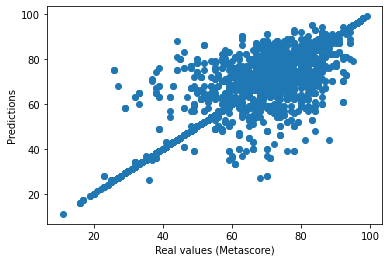

In [32]:
plt.scatter(y_test, y_pred)
plt.xlabel("Real values (Metascore)")
plt.ylabel("Predictions")
plt.show()

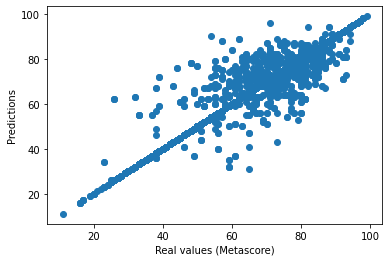

In [33]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Real values (Metascore)")
plt.ylabel("Predictions")
plt.show()

In [39]:
view = dtc.predict(X_test)

display(X_test.loc[2292])

title              1347.0
plataform            19.0
critic_reviews       61.0
user_score            8.3
ratings_numbers     177.0
developer           726.0
genre_split          13.0
Name: 2292, dtype: float64